<a href="https://colab.research.google.com/github/isabellaimcc/Final-Data-Bootcamp-Project/blob/main/Isabella_M_Cheque_C_EDA_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset
1. dowload the zip file
2. double click to obtain the .csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import os

In [ ]:
df = pd.read_csv('gym_dataset.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [ ]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [ ]:
print(df.shape)

(973, 15)


After doing print(df.shape), I can see that the dataset was loaded correctly because the output matches the dataset's description on Kaggle. 973 samples and 15 columns

When I did df.info(), I noticed that each column had 973 values in them. Therefore, I conclude that there is no missing data. Otherwise, I would have used .dropna()

In [ ]:
#Here, I am renaming the columns that have extra words within parenthises. This will make it easier for me to write code more concisely
df.rename(columns = {'Session_Duration (hours)': 'Session_Duration'},
          inplace = True)
df.rename(columns = {'Weight (kg)': 'Weight'},
          inplace = True)
df.rename(columns = {'Height (m)': 'Height'},
          inplace = True)
df.rename(columns = {'Water_Intake (liters)': 'Water_Intake'},
          inplace = True)
df.rename(columns = {'Workout_Frequency (days/week)': 'Workout_Frequency'},
          inplace = True)

In [ ]:
df['Workout_Type'] = df['Workout_Type'].astype('category') #this converts the workout type to a categorical variable

In [ ]:
print('Updated columns:', df.columns.tolist()) #checking to see if my column renaming changes were successfully executed

Updated columns: ['Age', 'Gender', 'Weight', 'Height', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake', 'Workout_Frequency', 'Experience_Level', 'BMI']


As mentioned in my write-up, I was initially drawn to the type of workout performed by gym members, so I'll start by analyzing that column.

In [ ]:
df['Workout_Type'].dtype #this will tell me the datatype of the column

CategoricalDtype(categories=['Cardio', 'HIIT', 'Strength', 'Yoga'], ordered=False, categories_dtype=object)

Counts:
 Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64


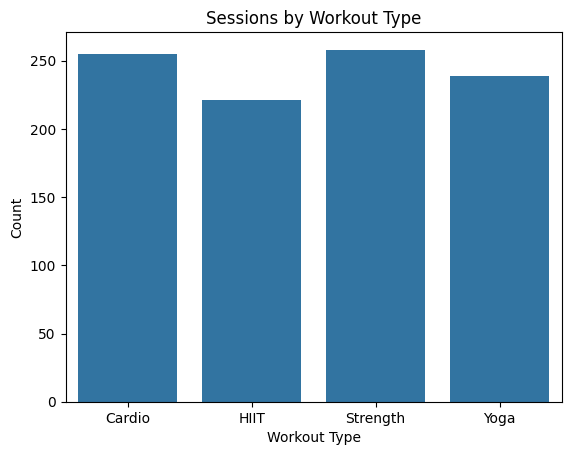

In [ ]:
type_counts = df['Workout_Type'].value_counts() #counting the values of each category (HIIT, Yoga, Cardio, Strength)
print('Counts:\n', type_counts) #printing the counts
plt.figure()
sns.countplot(x = 'Workout_Type', data = df)
plt.title('Sessions by Workout Type') #descriptive title
plt.xlabel('Workout Type')
plt.ylabel('Count')
plt.show()

Above, I can see that HIIT is the least frequent workout type. Strength and Cardio are the most popular workout types for gym members.

count     973.000000
mean      905.422405
std       272.641516
min       303.000000
25%       720.000000
50%       893.000000
75%      1076.000000
max      1783.000000
Name: Calories_Burned, dtype: float64


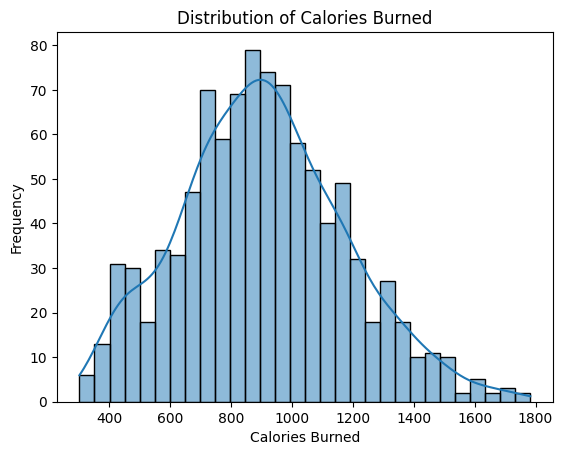

In [ ]:
print(df['Calories_Burned'].describe()) #this will display the summary stats
plt.figure()
sns.histplot(df['Calories_Burned'], bins = 30, kde = True) #creating a histogram with a density curve
plt.title('Distribution of Calories Burned') #a descriptive title.
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.show()

Looking at the histogram above, I see that a lot of gym members burned 900 calories (the mode). I am curious to see what type of workout is the most common among members at that peak (the mode).

In [ ]:
lower, upper = 850, 950 #defining a calorie window around the histogram's peak. between 850 and 950 calories.
peak_sessions = df[(df['Calories_Burned'] >= lower) & (df['Calories_Burned'] <= upper)] #creates a subset where calories burned are only within 850 and 950
peak_counts = peak_sessions['Workout_Type'].value_counts() #counts the number of times of each workout type within the 850-950 calories burned (the mode)
print('Workout types contributing to the peak around 900 calories:')
print(peak_counts)


Workout types contributing to the peak around 900 calories:
Workout_Type
Cardio      45
Strength    42
HIIT        35
Yoga        35
Name: count, dtype: int64


I can See that cardio is the most occuuring workout type

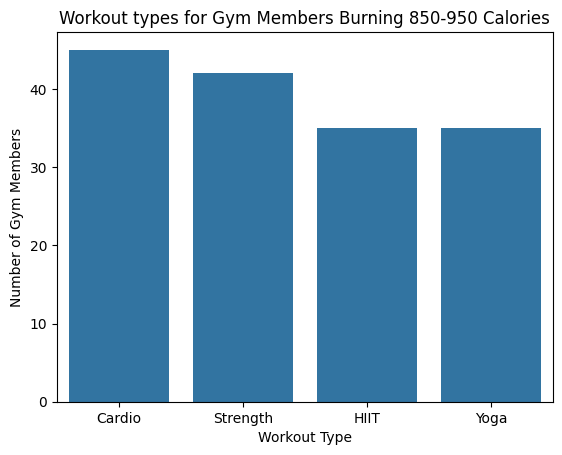

In [ ]:
#visualizing with a barplot
plt.figure()
sns.countplot(
    x = 'Workout_Type', #this is for the x-axis
    data = peak_sessions, #uses only values from the 850-950 calories window
    order = peak_counts.index #organizes the bars in descending order
)
plt.title('Workout types for Gym Members Burning 850-950 Calories')
plt.xlabel('Workout Type')
plt.ylabel('Number of Gym Members')
plt.show()


I can see that in the 850-950 calories burned window (which is the maximum peak in the histogram), Cardio and Stength workouts were the most common for the gym members.

Now, I'm interested in looking into the length of the workout sessions in this same window

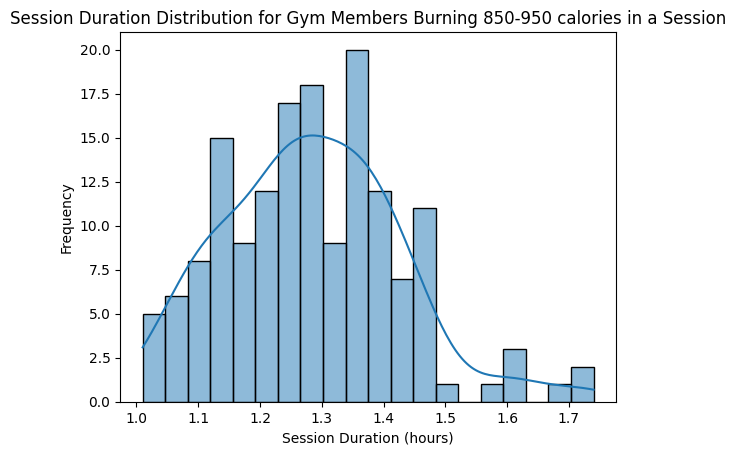

In [ ]:
plt.figure() #creating a new figure
sns.histplot(
    data = peak_sessions, #indicating that the data to be used is the 850-950 calories burned window
    x = 'Session_Duration', #plotting the session's duration in hours
    bins = 20, #breaking the data into 20 bars
    kde = True #including a density plot line
)
plt.title('Session Duration Distribution for Gym Members Burning 850-950 calories in a Session')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Frequency')
plt.show()

So by looking at the graph above, I know that I would have to workout for mostly 1.3 hours to burn 850-950 calories. Now, let's see the session lenghts by workout types.

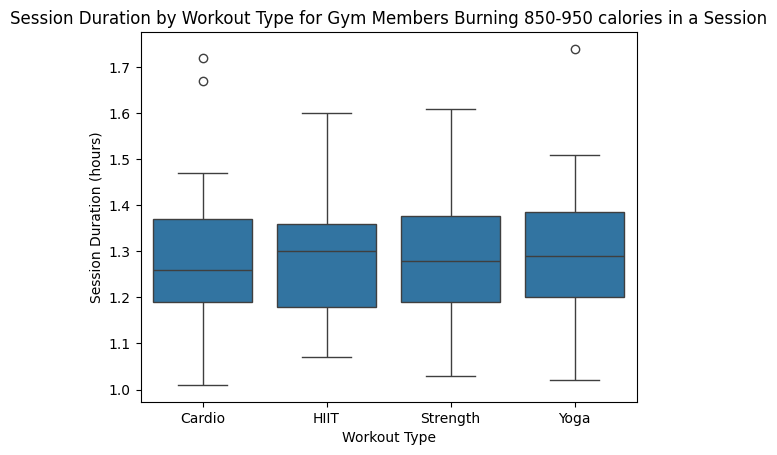

In [ ]:
plt.figure() #creating a new figure
sns.boxplot(
    x = 'Workout_Type', #splitting the data by the workout type
    y = 'Session_Duration', #session duration in hours to be used in the y-axis
    data = peak_sessions #only using the same 850-950 calories burned subset
)
plt.title('Session Duration by Workout Type for Gym Members Burning 850-950 calories in a Session')
plt.xlabel('Workout Type')
plt.ylabel('Session Duration (hours)')
plt.show()

Looking at the boxplot graphs, I noticed that workout session lenghts are similar across all of the workout types. In the histogram for cardio, however, I notice that it has the lowest median for session duration.

When I visualized the barplot titled, "Workout types for Gym Members Burning 850-950 Calories", I noticed that cardio and strenth workouts were the most frequent.

Therefore, I conclude that the cardio type of workout is the most consistent at burning 850-950 calories within a lower session duration. That's great to hear because I love doing cardio, and now I know that it's efficient given the lower time needed to burn a high amount of calories.



Now, I'll switch my focus on another interesting analysis that still involves a focus on cardio.


When I used to run a lot more every day, my resting heart rate would be 40 BPM. This data set also provides daata on heart rate at rest before workout, represented as Resting_BPM.


I would like to look more into a possible correlation between gym members who perform cardio workout type and their Resting_BPM, compared to other workout types.


I'm curious to see if other runners had a similar BPM as mine.

In [ ]:
rest_stats = df.groupby('Workout_Type')['Resting_BPM'].describe()
print('Resting_BPM stats by Workout_Type:\n', rest_stats) #generates summmary stats of rest_stats, including a title on the top

Resting_BPM stats by Workout_Type:
               count       mean       std   min   25%   50%   75%   max
Workout_Type                                                          
Cardio        255.0  61.988235  7.070223  50.0  57.0  62.0  68.0  74.0
HIIT          221.0  62.687783  7.346445  50.0  56.0  64.0  69.0  74.0
Strength      258.0  62.465116  7.473477  50.0  56.0  63.0  69.0  74.0
Yoga          239.0  61.782427  7.428846  50.0  55.0  62.0  68.0  74.0


<ipython-input-158-ec30e1cfc462>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rest_stats = df.groupby('Workout_Type')['Resting_BPM'].describe()


While looking at the summary stats, I notice that the BPM for cardio is less than HIIT and Strength workouts. However, it is higher than Yoga. I find this surprising, so I'll create a visual representation to better observe this.

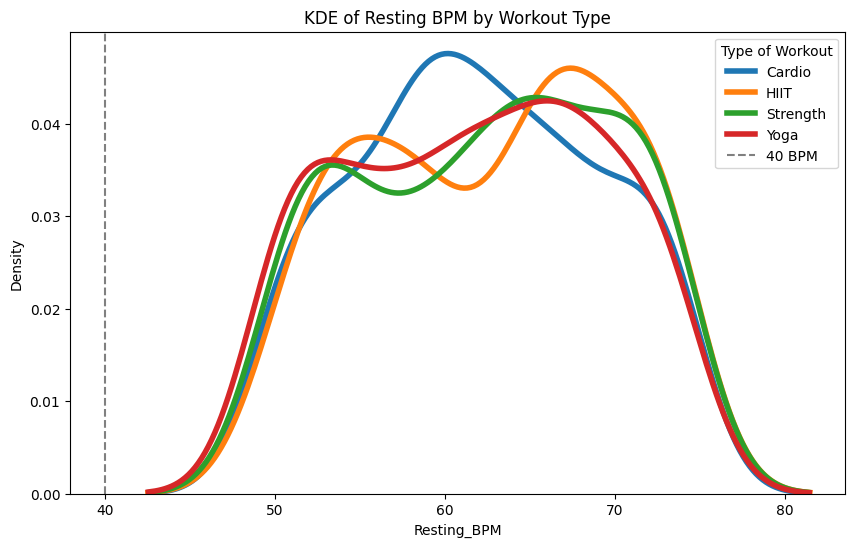

In [ ]:
#creating a graph with overlaid KDE curves. this will allow me to directly compare the distributions based on the smooth kde curves
plt.figure(figsize = (10, 6))
for wt in df['Workout_Type'].cat.categories: #starting a for loop that will run for each unique workout type
  sns.kdeplot( #creating KDE plots for each unique workout type
      data = df[df['Workout_Type'] == wt]['Resting_BPM'], #gathering the Resting_BPM values in the dataframe for the current workout type being processed in the for loop.
      label = wt, #assigning the label of the KDE plot to the current workout type being processed in the for loop
      lw = 4, #setting the width of the line
      fill = False #do not fill the kde, just include the outlines
  )
plt.axvline(40, color = 'gray', linestyle = '--', label = '40 BPM') #this will visualize a line that indicates my resting 40 BPM
plt.title('KDE of Resting BPM by Workout Type')
plt.xlabel('Resting_BPM')
plt.ylabel('Density')
plt.legend(title = 'Type of Workout')
plt.show()

As I look at the KDE plot, I noticed that none of the types of workouts include my own resting heart rate of 40 BPM, not even cardio. Next, I will generate another graph to visualize this same relationship to see if I can analyze it better than the one I just generated.

useful broken-down guide on using facetgrid:
https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

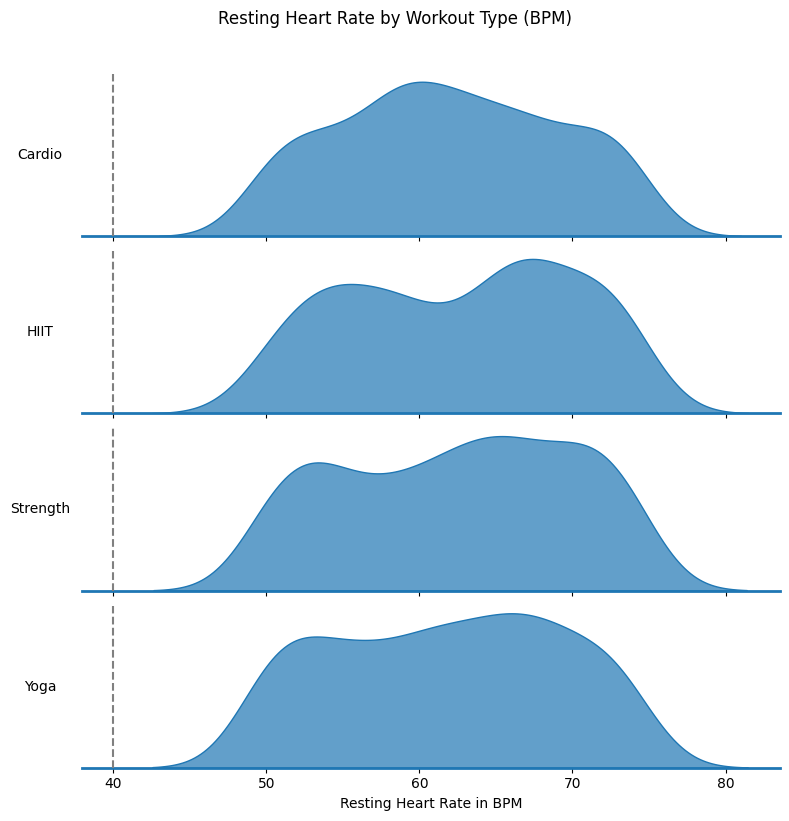

In [ ]:
order = ['Cardio', 'HIIT', 'Strength', 'Yoga'] #setting an order of how I want the categories to appear in the graph
df['Workout_Type'] = (
    df['Workout_Type'] #taking the existing column
      .astype('category') #converting the existing column's data type to category
      .cat.set_categories(order, ordered = True) #setting the category orders
    )

#the following creates the FacetGrid, which is part of the Seaborn library
g = sns.FacetGrid(
    df, #using the full data frame
    row = 'Workout_Type', #one row per category
    row_order = order, #instructed to use the order
    sharex = True, #the facets will share the x axes across rows
    sharey = False, #the facets will not share y axes across rows
    height = 2, #setting the height of each facet
    aspect = 4 #setting the aspect ration of each facet. Aspect*height will givee the width of each facet
)

#applying the filled-in KDEs to the facetgrids
g.map(
    sns.kdeplot,
    'Resting_BPM', #indicates the varibale that is to be drawn
    fill = True, #fills in the area under the kde curve
    alpha = 0.7, #setting the transparency of the filled-in area
    bw_adjust = 1 #smoothing parameter
)

g.map(plt.axhline, y = 0, lw = 2, clip_on = False) #draws a horizontal baseline of y = 0
g.map(plt.axvline, x = 40, ls = '--', lw = 1.5, color = 'gray') #this draws a vertical dashed line to indicate my own resting heart rate of 40 BPM on every facet.

#labeling the ridges on the y-axis by the type of workout
for ax, wt in zip(g.axes.flatten(), order):
  ax.set_ylabel(wt, rotation = 0, labelpad = 30, va = 'center') #setting the y-axis label by the workout type. The horizontal rotation of the text and its distance from the axis is also set.

g.set_titles('') #this drops the defauly subtitle of 'Workout_Type'.
g.set(yticks = [], xlabel = 'Resting Heart Rate in BPM') #setting the x-axis label.
g.despine(bottom = True, left = True) #taking the left and bottom spines.

plt.subplots_adjust(hspace = -0.3)
g.fig.suptitle('Resting Heart Rate by Workout Type (BPM)', y = 1.02) #setting the title for the grid
plt.tight_layout()
plt.show()

Looking at the grid, I notice that my resting heart rate of 40 BPM is very low, even for cardio runners. This could be explained by the fact that most of my running was done outdoors, which often meant longer distances. Running indoors on a treadmill could be harder—-I know it was for me.

In [ ]:
cardio = df[df.Workout_Type == 'Cardio'].Resting_BPM #looking at the resting heart rates (BPM) of gym members that did cardio type workouts
(cardio < 45).mean() #calculating the precentage of resting heart rate below 45 BPM

np.float64(0.0)

Looking at that output, I read it as 0% of the gym members who did cardio workouts had a resting heart rate of less than 45 BPM. This might be due to the less milage ran on treadmills (unfortunately, I cannot look into this because the data on milage is not provided). Generally speaking (in the real world), those who consistently run long distances eventually get a lower resting heart rate.

Moving to another curiosity, I would like to analyze this dataset's correlation between BMI and calories burned. Generally speak (in the real world), I've heard that people with higher BMI's tend to burn more calories. I would like to see if this claim is corroborated by the gym members dataset.

<ipython-input-162-a48ff64cf221>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['BMI_bin', 'Workout_Type'])['Calories_Burned'] #grouping the bins by BMI and the type of workout, and then selecting the calories burned column


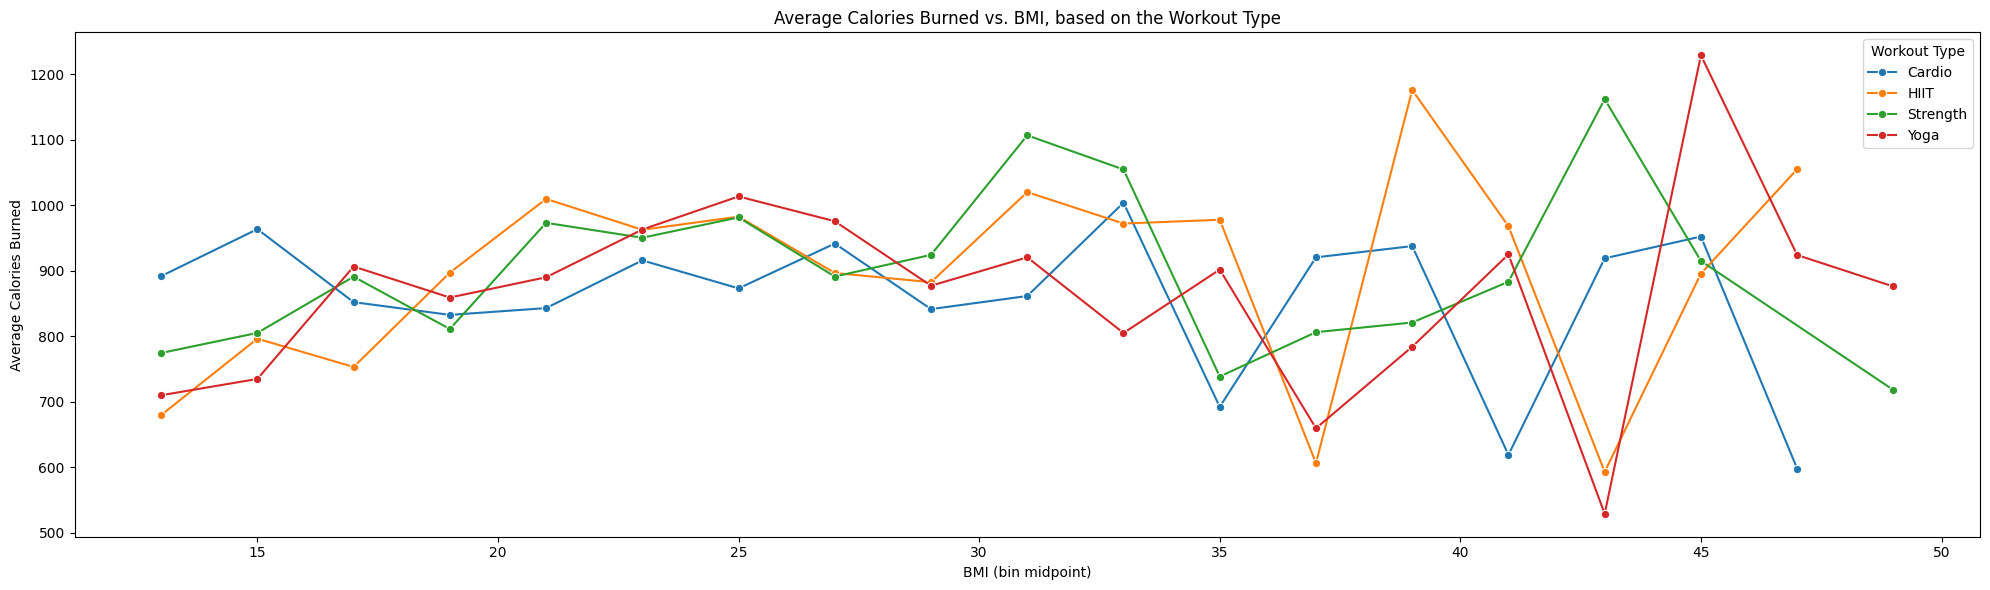

In [ ]:
#creating BMI bins
min_bmi, max_bmi = df['BMI'].min(), df['BMI'].max() #finding out the min and maximum BMI to set the bin edges
bins = np.arange( #creates an array of BMI bins
    start = int(np.floor(min_bmi)), #starting at the minimum BMI
    stop = int(np.ceil(max_bmi)) + 2, #going up ceiling by the max BMI + 2
    step = 2) #the step size is 2 BMI units


df['BMI_bin'] = pd.cut( #cutting the BMI column into bins
    df['BMI'], #taking the original BMI values
    bins = bins) #indicates the edges of the bins, as defined above

#calculating the average calories burned in each BMI bin, for each type of workout
grouped = (
    df
    .groupby(['BMI_bin', 'Workout_Type'])['Calories_Burned'] #grouping the bins by BMI and the type of workout, and then selecting the calories burned column
    .mean() #calculates the mean of each group
    .reset_index(name = 'Avg_Calories') #turning the grouped series back into a dataframe
)

grouped['BMI_mid'] = grouped['BMI_bin'].apply(
    lambda interval: interval.mid ) #taking the midpoint of each interval

#below, I plot the average calories against the BMI midpoint, one for each type of workout.
plt.figure(figsize = (20, 6))
sns.lineplot(
    data = grouped,
    x = 'BMI_mid', #using the bin midpoints
    y = 'Avg_Calories', #using the mean of calories burned
    hue = 'Workout_Type', #separates each line by the type of workout
    marker = 'o', #using circles to represent the data points
)

#adding titles and labels to the plot
plt.title('Average Calories Burned vs. BMI, based on the Workout Type')
plt.xlabel('BMI (bin midpoint)')
plt.ylabel('Average Calories Burned')
plt.legend(title = 'Workout Type')
plt.tight_layout()
plt.show()

As I look at the graph, I notice that the highest points of calories being burned is towards the right where the BMI's are the highest. I see that Strength, Yoga, and HIIT burned the most calories where BMI was the highest. Surprisingly, Cardio remained the most constant until it hit a BMI of 30, which happens to be the baseline BMI that is considered obese. This got me curious, could it be that obese people (BMI 30 or higher) burn less calories in cardio because it is harder for them to run, thus spending less time? What I mean is, is does the calories burned for cardio vary a lot because it's harder for obese people to run? My thinking is that if it's harder to run, then workout durations will vary greatly.

In [ ]:
obese = 30 #defining the obesity threshold
obese_cardio = df[ #selecting only the rows where Workout_Type is cardio and where the BMI is greater than 30
    (df['Workout_Type'] == 'Cardio') & #select only cardio type workouts
    (df['BMI'] >= obese) #include only BMI 30 or higher
].copy() #copying to prevent index warnings

print('Number of obese cardio sessions (BMI 30 or higher):', len(obese_cardio)) #will calculate how many obese people with cardio workout sessions

#generating the descriptive statistics for the length of workout sessions
print('\nSession Duration stats for Obese Cardio Workout Sessions:')
print(obese_cardio['Session_Duration'].describe())

Number of obese cardio sessions (BMI 30 or higher): 56

Session Duration stats for Obese Cardio Workout Sessions:
count    56.000000
mean      1.175357
std       0.304356
min       0.530000
25%       1.010000
50%       1.205000
75%       1.342500
max       1.990000
Name: Session_Duration, dtype: float64


the mean for obese cardio workout is already looking lower than the mean for overall cardio workout

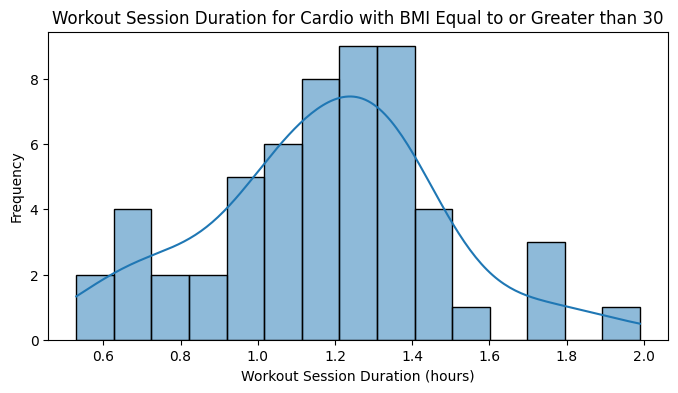

In [ ]:
plt.figure(figsize = (8, 4))
sns.histplot(
    data = obese_cardio, #using only the filtered subset
    x = 'Session_Duration', #plots the workout duration
    bins = 15, #setting to 15 bars
    kde = True, #displays the density curve
    color = 'tab:blue', #sets the color of the bars to blue
    edgecolor = 'black' #sets the color of the bar edges to black
)
plt.title(f'Workout Session Duration for Cardio with BMI Equal to or Greater than {obese}')
plt.xlabel('Workout Session Duration (hours)')
plt.ylabel('Frequency')
plt.show()


I can see that the mode is a little higher than 1.2 hours

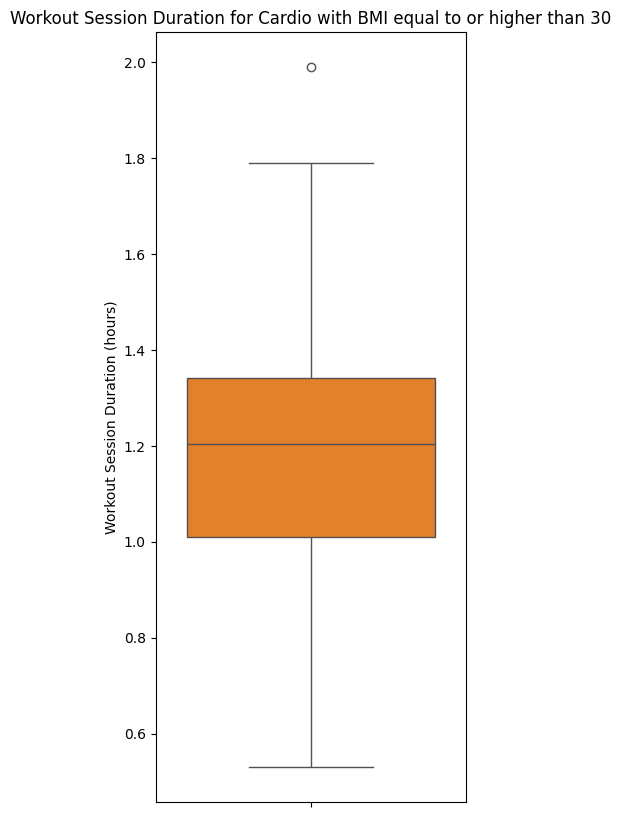

In [ ]:
plt.figure(figsize = (4, 10))
sns.boxplot(
    y = obese_cardio['Session_Duration'],
    color = 'tab:orange' #setting the color of the boxes to orange
)

plt.title(f'Workout Session Duration for Cardio with BMI equal to or higher than {obese}')
plt.ylabel('Workout Session Duration (hours)')
plt.show()

Looking at both graphs that I generated, I see that the mode and median of cardio workout session is close to 1.2 hours. I will generate a similar boxplot that shows the NON-OBESE in the context of cardio sessions duration

Number of non-obese cardio workout sessins: 199


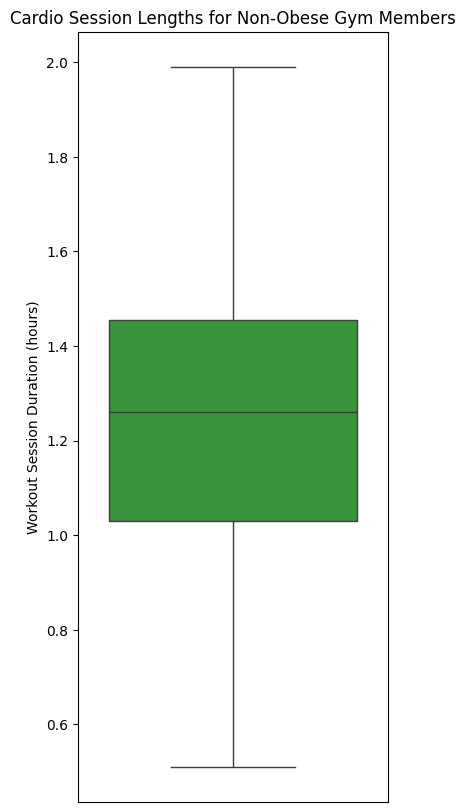

In [ ]:
cardio_nonobese = df[
    (df['Workout_Type'] == 'Cardio') & #selecting only the cardio workouts
    (df['BMI'] < 30) #selecting only the gym members that are non obese (under the BMI of 30)
].copy()

#printing how many sessions in this group
print('Number of non-obese cardio workout sessins:', len(cardio_nonobese))

#creating the boxplot
plt.figure(figsize = (4, 10))
sns.boxplot(
    y = cardio_nonobese['Session_Duration'], #using the session duration data within the nonobese subset
    color = 'tab:green' #setting the color of the boxes to green
)

plt.title('Cardio Session Lengths for Non-Obese Gym Members')
plt.ylabel('Workout Session Duration (hours)')
plt.xticks([]) #hides the empty x-axis's ticks
plt.show()

After generating the cardio session lengths for non-obese gym members, I notice that the median value is slightly higher. The range of values for non-obese people are slightly higher. The 1st quartile value, the median, the 3rd quartile value, and the 4th quartile value for non-obese are all slightly higher than the obese gym members cardio session durations.

Overall, I do notice a smaller range of workout session length for obese people. Therefore, my earlier claim is somewhat coroborrated: obese people burn less calories in cardio because they spend less time running than non-obese people.